In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()

In [7]:
data = {} # data[L, p] contains (fail_rate, density)
for f in glob.glob('data/run_8/run_8_*_*.npy'):
    L = int(f.split("_")[3])
    n = int(f.split("_")[4].split(".")[0])
    data[L, n] = np.load(f, allow_pickle = True)

In [27]:
fails = np.empty((10, 100), dtype = np.float32)
for L in range(10, 101, 10):
    for n in range(100):
        try:
            fails[int(L // 10) - 1, n] = data[L, n]
        except Exception:
            print(f"No data for L={L}, n={n}!")
            fails[int(L // 10) - 1, n] = np.NaN

No data for L=70, n=91!
No data for L=90, n=19!
No data for L=90, n=20!
No data for L=100, n=19!
No data for L=100, n=20!
No data for L=100, n=21!
No data for L=100, n=22!
No data for L=100, n=23!
No data for L=100, n=24!
No data for L=100, n=25!
No data for L=100, n=62!
No data for L=100, n=65!
No data for L=100, n=68!
No data for L=100, n=71!
No data for L=100, n=72!
No data for L=100, n=73!
No data for L=100, n=74!
No data for L=100, n=75!
No data for L=100, n=99!


In [28]:
fails

array([[2.52e-03, 2.51e-03, 2.44e-03, 2.55e-03, 2.68e-03, 2.41e-03,
        2.40e-03, 2.17e-03, 2.18e-03, 2.25e-03, 2.45e-03, 2.36e-03,
        2.73e-03, 2.38e-03, 2.30e-03, 2.61e-03, 2.70e-03, 2.39e-03,
        2.57e-03, 2.01e-03, 2.65e-03, 2.44e-03, 2.47e-03, 2.13e-03,
        2.39e-03, 2.51e-03, 2.32e-03, 2.27e-03, 2.52e-03, 2.63e-03,
        2.33e-03, 2.35e-03, 2.23e-03, 2.33e-03, 2.46e-03, 2.43e-03,
        2.46e-03, 2.25e-03, 2.35e-03, 2.66e-03, 2.13e-03, 2.50e-03,
        2.43e-03, 2.10e-03, 2.47e-03, 2.69e-03, 2.35e-03, 2.23e-03,
        2.28e-03, 2.31e-03, 2.35e-03, 2.34e-03, 2.47e-03, 2.44e-03,
        2.31e-03, 2.57e-03, 2.43e-03, 2.62e-03, 2.72e-03, 2.48e-03,
        2.79e-03, 2.41e-03, 2.05e-03, 2.19e-03, 2.35e-03, 2.12e-03,
        2.03e-03, 2.24e-03, 2.31e-03, 2.21e-03, 2.69e-03, 2.19e-03,
        2.34e-03, 2.31e-03, 2.40e-03, 2.64e-03, 2.15e-03, 2.48e-03,
        2.48e-03, 2.09e-03, 2.47e-03, 2.39e-03, 2.06e-03, 2.33e-03,
        2.40e-03, 2.63e-03, 2.08e-03, 2.21e-03, 

In [29]:
avg = np.nanmean(fails, axis = 1)

In [30]:
L_ticks = np.arange(10, 101, 10)

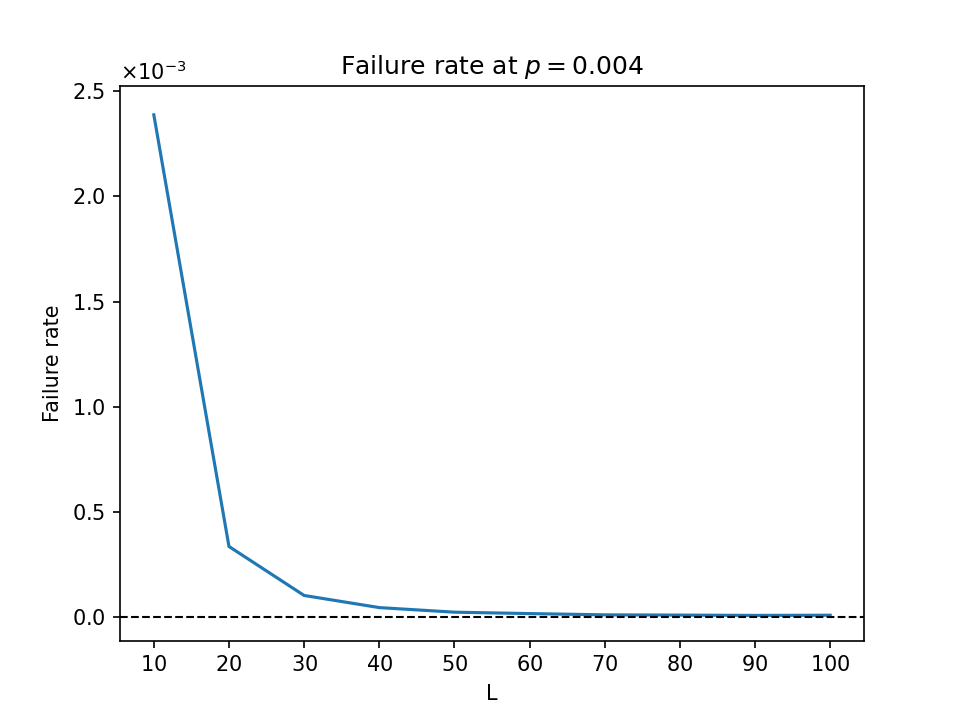

In [31]:
plt.plot(L_ticks, avg)
error = np.sqrt(avg * (1 - avg)) / np.sqrt(10000000)
plt.fill_between(L_ticks, avg - error, avg + error, alpha = 0.5)
plt.axhline(color = "k", lw = 1, linestyle = "--")
plt.xlabel("L")
plt.ylabel("Failure rate")
plt.title("Failure rate at $p=0.004$")
plt.xticks(L_ticks)
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.savefig("plots/run8.png")
plt.show()

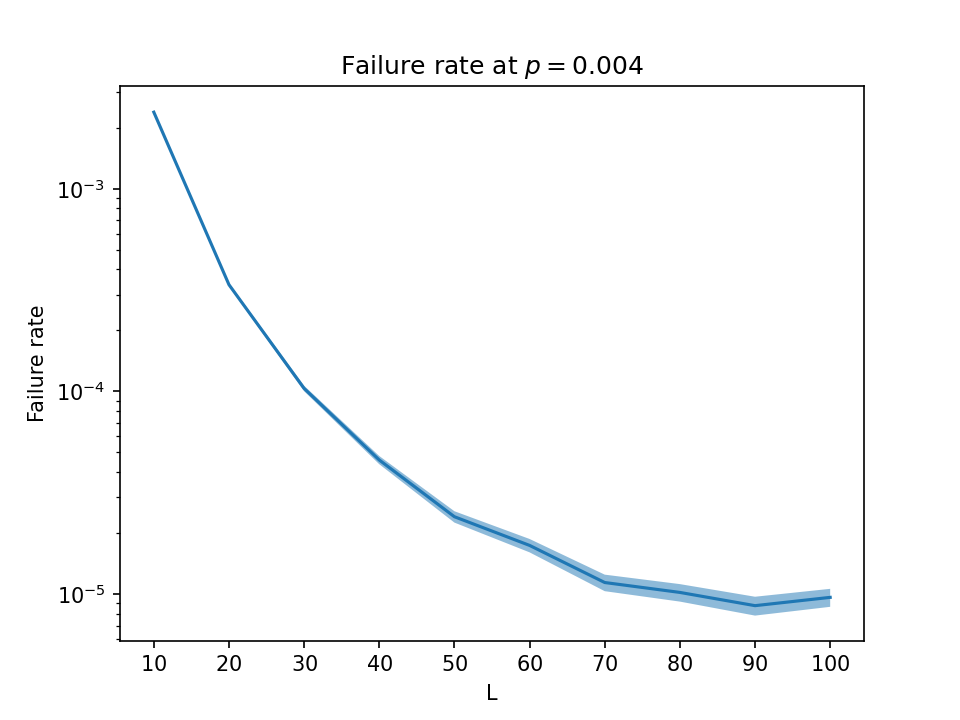

In [32]:
plt.plot(L_ticks, avg)
error = np.sqrt(avg * (1 - avg)) / np.sqrt(10000000)
plt.fill_between(L_ticks, avg - error, avg + error, alpha = 0.5)
# plt.axhline(color = "k", lw = 1, linestyle = "--")
plt.xlabel("L")
plt.ylabel("Failure rate")
plt.title("Failure rate at $p=0.004$")
plt.xticks(L_ticks)
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.yscale("log")
plt.savefig("plots/run8_log.png")
plt.show()